# Лабораторная работа №6. Сэмплирование (генерация случайных величин)

Для своей функции распределения (нормированная непрерывная функция: интеграл от -бесконечности до +бесконечности = 1) просэмплировать через два метода, реализованных самостоятельно:
- Выборка отклонения
- Метод Метрополиса-Гастингса

In [69]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

### Выбранная функция

Логарифмически нормальное распределение

$ f(x) = \frac{1}{x\delta\sqrt{2\pi}}\exp\left(-\frac{(ln(x)-a)^2}{2\delta^2}\right)$, x > 0

In [74]:
def log_norm(x, delta = 1, a = 2):
    return math.exp(-((np.log(x) - a) ** 2) / (2 * (delta ** 2))) / (x * delta * math.sqrt(2 * math.pi))

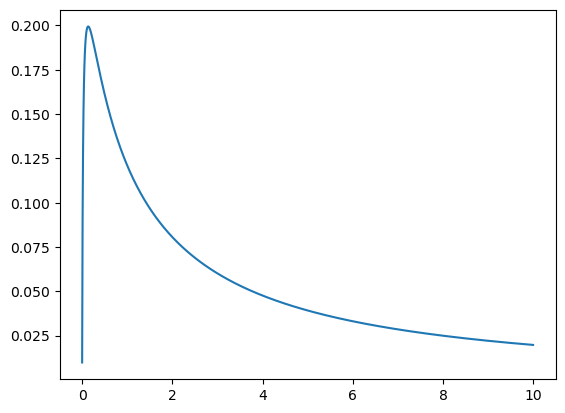

In [76]:
x = np.arange(0.001, 10, 0.01)
y = np.array([log_norm(xx, 2, 2) for xx in x])
plt.plot(x, y)
plt.show()

### Выборка отклонения

1) Выбираем рандомную точку от 0 до cq(x), где cq(x) - вспомогательное распределение которое умеем сэмплировать (нормальное)
2) Если эта точка ниже сэмплируемой функции, берем её

In [72]:
#плотность нормального распределения
def norm_distribution(x, delta = 4, mu = 4):
    return math.exp(-(((x - mu) / delta)** 2) / 2) / (delta * math.sqrt(2 * math.pi))

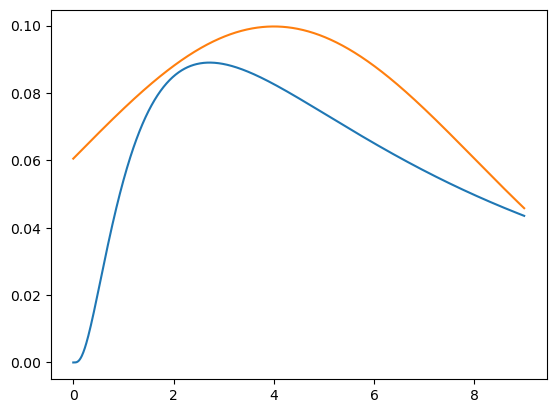

In [78]:
x = np.arange(0.001, 9, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым
plt.show()

In [114]:
def rejection_sample(a, b, f_sample, f_base):
    points = []
    for x in np.arange(a, b, 0.05):
        u = random.uniform(0, f_base(x))
        if u < f_sample(x):
            points.append([x, u])
    return points

In [115]:
sampled_points = rejection_sample(0.001, 9, log_norm, norm_distribution)

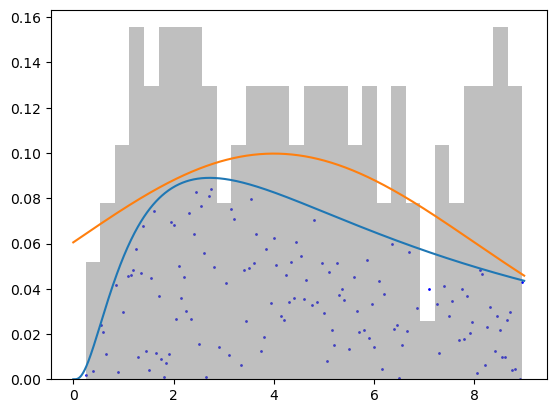

In [118]:
x = np.arange(0.001, 9, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым

all_x = [p[0] for p in sampled_points]
all_y = [p[1] for p in sampled_points]
plt.scatter(all_x, all_y, s=1,color = "blue")
plt.hist(all_x, 30, density=True, color="grey", alpha = 0.5)
plt.show()

### Метод Метрополиса-Гастингса

In [122]:
def metropolis_hasting(n, x0, f_sample, f_base):
    points = [x0]
    x_prev = x0
    while len(x) < n:
        x_next = f_base(x_prev)
        a1 = f_sample(x_next) / f_sample(x_prev)
        a2 = f_base(x_next) / f_base(x_prev)
        if a1 * a2 >= 1:
            points.append(x_next)
            x_prev = x_next
        else:
            u = random.uniform(0, q)
            if u <= a1 * a2:
                points.append(x_next)
                x_prev = x_next
            else:
                points.append(x_prev)
    return x

In [126]:
sampled_points = (1000, 0, log_norm, norm_distribution)

In [127]:
sampled_points

(1000,
 0,
 <function __main__.log_norm(x, delta=1, a=2)>,
 <function __main__.norm_distribution(x, delta=4, mu=4)>)

TypeError: '<=' not supported between instances of 'int' and 'function'

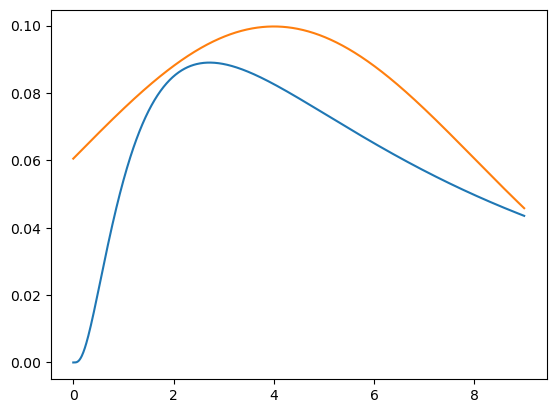

In [124]:
x = np.arange(0.001, 9, 0.01)
y = np.array([log_norm(xx, 1, 2) for xx in x])
y_norm = np.array([norm_distribution(xx, 4, 4) for xx in x])
plt.plot(x, y)
plt.plot(x, y_norm) #оранжевым

plt.hist(sampled_points, 30, density=True, color="grey", alpha = 0.5)
plt.show()